In [25]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import glob
import numpy as np
import re
import math

In [26]:
# Define files to read
path = 'C:/Users/guypw/OneDrive/Documents/resolvinAnalysis/data/lipidomics/Results/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [27]:
# Import data
dfs = []

for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    
    df['Comparison'] = f
    
    dfs.append(df)

In [28]:
# Combine all dataframes
df = pd.concat(dfs)

In [29]:
# Calculate -log(P-value)
df['minuslog10adjustedpvalue'] = -np.log10(df["adj.P.Val"])
df['minuslog10pvalue'] = -np.log10(df["P.Value"])

In [30]:
comparisonsList = {
'FastVsSlowFastEarlyVsFastLate.csv': 'Early Fast vs Late Fast',
'ProgressionAndSightOfOnsetgroupFastBulbarLateVsgroupSlowBulbarLate.csv': 'Late Fast Bulbar vs Late Slow Bulbar',
'ProgressionAndSightOfOnsetgroupSlowLimbLateVsgroupFastLimbLate.csv': 'Late Slow Limb vs Late Fast Limb',
'ProgressionAndSightOfOnsetgroupFastLimbLateVsgroupSlowLimbLate.csv': 'Late Fast Limb vs Late Slow Limb',
'SightOfOnsetVsControlLimbLateVsControl.csv': 'Late Limb vs Control',
'SightOfOnsetVsControlLimbEarlyVsControl.csv': 'Limb vs Control',
'SightOfOnsetVsControlBulbarLateVsControl.csv': 'Late Bulbar vs Control',
'SightOfOnsetVsControlBulbarLateVsControl.csv': 'Bulbar vs Control',
'ProgressionVsControlSlowLateVsControl.csv': 'Late Slow vs Control',
'ProgressionVsControlSlowEarlyVsControl.csv': 'Slow vs Control',
'ProgressionVsControlFastLateVsControl.csv': 'Late Fast vs Control',
'ProgressionVsControlFastEarlyVsControl.csv': 'Fast vs Control',
'ProgressionVsControlFastEarlyVsControl.csv': 'Fast vs Control',
'ProgressionAndSightOfOnsetVsControlFastLimbLateVsControl.csv': 'Late Fast Limb vs Control',
'ProgressionAndSightOfOnsetgroupFastBulbarEarlyVsgroupSlowBulbarEarly.csv': 'Early Fast Bulbar vs Early Slow Bulbar',
'ProgressionAndSightOfOnsetgroupFastLimbEarlyVsgroupFastBulbarEarly.csv': 'Early Fast Limb vs Early Fast Bulbar',
'ProgressionAndSightOfOnsetgroupFastBulbarEarlyVsgroupFastLimbEarly.csv': 'Early Fast Bulbar vs Early Fast Limb',
'ProgressionAndSightOfOnsetgroupFastLimbEarlyVsgroupFastLimbLate.csv': 'Early Fast Limb vs Late Fast Limb',
'ProgressionAndSightOfOnsetVsControlSlowBulbarEarlyVsControl.csv': 'Early Slow Bulbar vs Control',
'BulbarVsLimbBulbarEarlyVsBulbarLate.csv': 'Early Bulbar vs Late Bulbar',
'ProgressionAndSightOfOnsetgroupSlowBulbarEarlyVsgroupSlowBulbarLate.csv': 'Early Slow Bulbar vs Late Slow Bulbar',
'ProgressionAndSightOfOnsetgroupSlowBulbarLateVsgroupSlowLimbLate.csv': 'Late Slow Bulbar vs Late Slow Limb',
'ProgressionAndSightOfOnsetgroupSlowBulbarLateVsgroupSlowLimbLate.csv': 'Late Slow Bulbar vs Late Slow Limb',
'FastVsSlowFastEarlyVsSlowEarly.csv': 'Early Fast vs Early Slow',
'FastVsSlowFastLateVsSlowLate.csv': 'Late Fast vs Late Slow',
'ProgressionAndSightOfOnsetgroupSlowBulbarEarlyVsgroupSlowLimbEarly.csv': 'Early Slow Bulbar vs Early Slow Limb',
'SightOfOnsetVsControlBulbarEarlyVsControl.csv': 'Bulbar vs Control',
'CaseVsControlEarlyVsControl.csv': 'ALS vs Control',
'ProgressionAndSightOfOnsetgroupFastBulbarEarlyVsgroupFastBulbarLate.csv': 'Early Fast Bulbar vs Late Fast Bulbar',
'ProgressionAndSightOfOnsetgroupFastBulbarLateVsgroupFastLimbLate.csv': 'Late Fast Bulbar vs Late Fast Limb',
'EarlyVsLateEarlyVsLate.csv': 'Early vs Late',
'ProgressionAndSightOfOnsetgroupSlowLimbEarlyVsgroupSlowLimbLate.csv': 'Early Slow Limb vs Late Slow Limb',
'ProgressionAndSightOfOnsetgroupFastLimbEarlyVsgroupSlowLimbEarly.csv': 'Early Fast Limb vs Early Slow Limb',
'ProgressionAndSightOfOnsetVsControlSlowBulbarLateVsControl.csv': 'Slow Bulbar vs Control',
'CaseVsControlLateVsControl.csv': 'Late ALS vs Control',
'BulbarVsLimbBulbarEarlyVsLimbEarly.csv': 'Early Bulbar vs Early Limb',
'BulbarVsLimbBulbarLateVsLimbLate.csv': 'Late Bulbar vs Late Limb',
'BulbarVsLimbLimbEarlyVsLimbLate.csv': 'Early Limb vs Late Limb',
'FastVsSlowSlowEarlyVsSlowLate.csv': 'Early Slow vs Late Slow'
}

In [31]:
df['Comparison'] = [re.sub('C:/Users/guypw/OneDrive/Documents/resolvinAnalysis/data/lipidomics/Results\\\\', '', comparison) for comparison in df['Comparison']]

In [32]:
df = df[df['Comparison'].isin(comparisonsList.keys())]

In [33]:
for key in comparisonsList.keys():
    df.loc[df['Comparison'] == key, 'Comparison'] = comparisonsList[key]

In [34]:
df['spmIntegers'] = 0

df = df.sort_values(by=['Unnamed: 0'])

uniqueRowNames = set(df['Unnamed: 0'])
uniqueRowNames = sorted(uniqueRowNames)

i = 1

for rowName in uniqueRowNames:
    df.loc[df['Unnamed: 0'] == rowName, 'spmIntegers'] = i
    i = i + 1

In [35]:
df['comparisonIntegers'] = 0

df = df.sort_values(by=['Comparison'])

uniqueRowNames = set(df['Comparison'])
uniqueRowNames = sorted(uniqueRowNames)

i = 1

for rowName in uniqueRowNames:
    df.loc[df['Comparison'] == rowName, 'comparisonIntegers'] = i
    i = i + 1

In [36]:
markers = ["o", "<", ">", "8", "s", "p", "P", "*", "h", "H", "X", "D", "d"]

In [37]:
df['comparisonMarker'] = 0

uniqueComparisons = set(df['Comparison'])
uniqueComparisons = sorted(uniqueComparisons)

for rowName in uniqueComparisons:
    number = int(list(set(df.loc[df['Comparison'] == rowName, 'comparisonIntegers']))[0])
    remainder = math.floor(number/len(markers))
    shape = markers[number - remainder * len(markers)]
    df.loc[df['Comparison'] == rowName, 'comparisonMarker'] = shape

In [38]:
df["expression"] = "Not Statistically Different"
df["expressionEdgecolors"] = "#eeeeee"

df.loc[df['logFC'] > 0, "expression"] = "Upregulated"
df.loc[df['logFC'] > 0, "expressionEdgecolors"] = "red"
df.loc[df['logFC'] < 0, "expression"] = "Downregulated"
df.loc[df['logFC'] < 0, "expressionEdgecolors"] = "blue"
df.loc[df['adj.P.Val'] > 0.05, "expression"] = "Not Statistically Different"
df.loc[df['adj.P.Val'] > 0.05, "expressionEdgecolors"] = "#C5C5C5"

In [39]:
df["logFCColor"] = "#FF0000"

maxLogFC = math.ceil(max(abs(max(df['logFC'])), abs(min(df['logFC']))))

df.loc[df['logFC'] < (maxLogFC)*(4/5), "logFCColor"] = "#FF2E2E"
df.loc[df['logFC'] < (maxLogFC)*(3/5), "logFCColor"] = "#FF5C5C"
df.loc[df['logFC'] < (maxLogFC)*(2/5), "logFCColor"] = "#FF8A8A"
df.loc[df['logFC'] < (maxLogFC)*(1/5), "logFCColor"] = "#ffffff"
df.loc[df['logFC'] < (0-maxLogFC)*(1/5), "logFCColor"] = "#8A8AFF"
df.loc[df['logFC'] < (0-maxLogFC)*(2/5), "logFCColor"] = "#5C5CFF"
df.loc[df['logFC'] < (0-maxLogFC)*(3/5), "logFCColor"] = "#2E2EFF"
df.loc[df['logFC'] < (0-maxLogFC)*(3/5), "logFCColor"] = "#0000FF"

In [40]:
df = df.sort_values(by=['Comparison'])

In [41]:
df.head()

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,Comparison,minuslog10adjustedpvalue,minuslog10pvalue,spmIntegers,comparisonIntegers,comparisonMarker,expression,expressionEdgecolors,logFCColor
20,RvE1,-0.451580,1.715333,-0.490854,0.625660,0.829183,-4.603902,ALS vs Control,0.081350,0.203662,28,1,<,Not Statistically Different,#C5C5C5,#ffffff
3,"7S,14S-diHDHA",-1.407192,1.717187,-1.801135,0.077664,0.624588,-4.567565,ALS vs Control,0.204406,1.109782,7,1,<,Not Statistically Different,#C5C5C5,#8A8AFF
1,LXA4,-0.676398,0.623744,-2.075843,0.043028,0.624588,-4.505464,ALS vs Control,0.204406,1.366253,9,1,<,Not Statistically Different,#C5C5C5,#ffffff
31,MaR1n-3DPA,0.049414,1.081669,0.087540,0.930589,0.972303,-4.618590,ALS vs Control,0.012198,0.031242,12,1,<,Not Statistically Different,#C5C5C5,#ffffff
4,RvD2n-3DPA,-1.365619,2.607440,-1.665046,0.102107,0.624588,-4.581474,ALS vs Control,0.204406,0.990946,22,1,<,Not Statistically Different,#C5C5C5,#8A8AFF


In [42]:
spmDf = df

In [43]:
resolvinsDf = df[df["Unnamed: 0"].str.contains("Rv")]

In [44]:
resolvinsDf.head()

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B,Comparison,minuslog10adjustedpvalue,minuslog10pvalue,spmIntegers,comparisonIntegers,comparisonMarker,expression,expressionEdgecolors,logFCColor
20,RvE1,-0.451580,1.715333,-0.490854,0.625660,0.829183,-4.603902,ALS vs Control,0.081350,0.203662,28,1,<,Not Statistically Different,#C5C5C5,#ffffff
4,RvD2n-3DPA,-1.365619,2.607440,-1.665046,0.102107,0.624588,-4.581474,ALS vs Control,0.204406,0.990946,22,1,<,Not Statistically Different,#C5C5C5,#8A8AFF
26,RvT3n-3 DPA,-0.168374,0.706874,-0.405886,0.686544,0.829183,-4.621289,ALS vs Control,0.081350,0.163332,32,1,<,Not Statistically Different,#C5C5C5,#ffffff
9,RvT1n-3 DPA,-0.582694,0.950315,-1.050559,0.298471,0.755264,-4.593749,ALS vs Control,0.121901,0.525098,31,1,<,Not Statistically Different,#C5C5C5,#ffffff
11,RvD5n-3 DPA,-0.676362,1.244663,-1.035544,0.305357,0.755264,-4.594430,ALS vs Control,0.121901,0.515193,26,1,<,Not Statistically Different,#C5C5C5,#ffffff


13
1
26
14
39
27


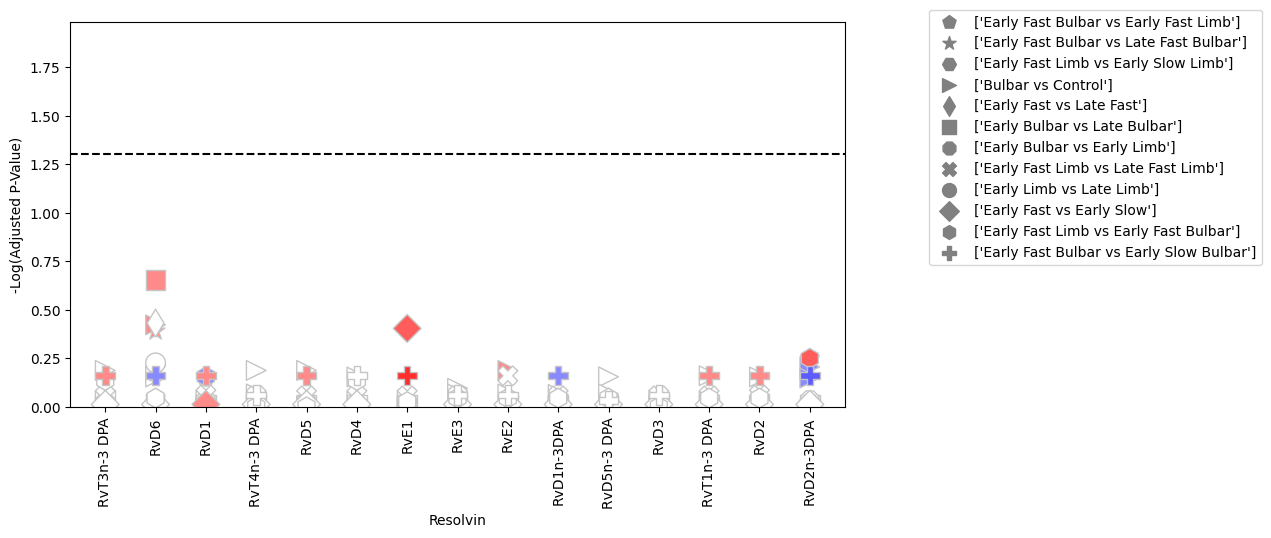

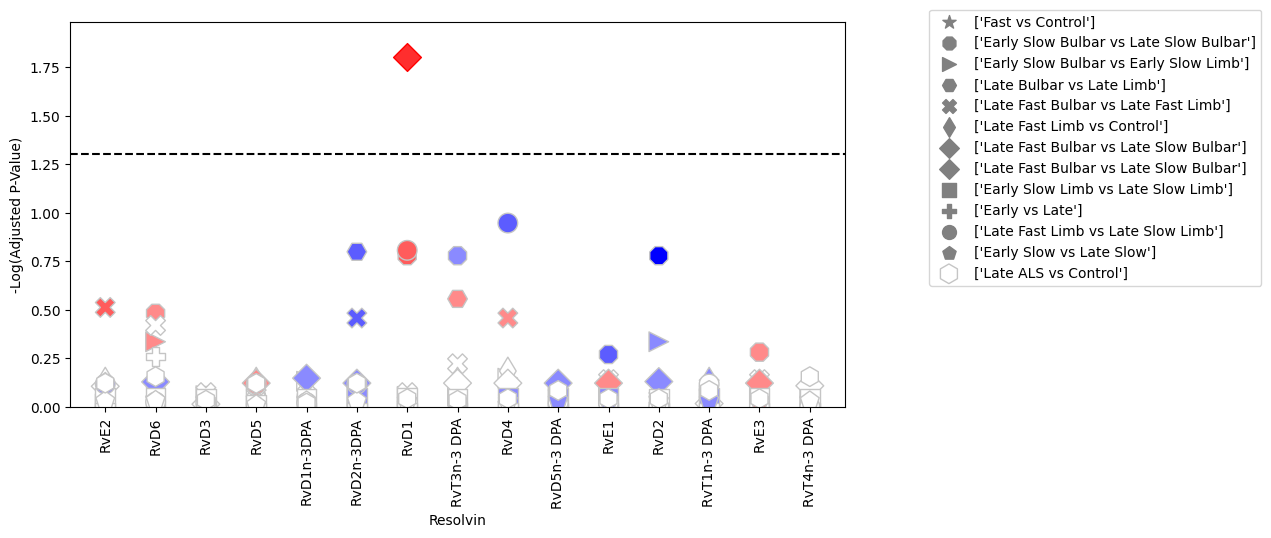

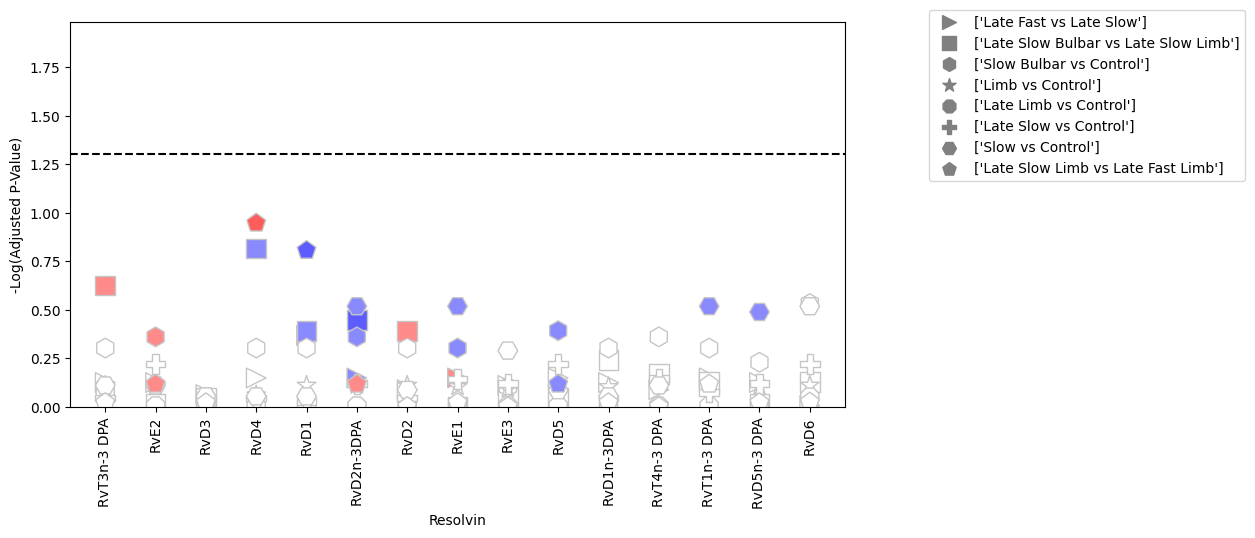

In [68]:
for iteration in range(1,math.ceil(len(uniqueComparisons)/len(markers))+1):
    data = resolvinsDf
    data = data.sort_values(by=['Comparison'])
    data = data.loc[data['comparisonIntegers'] <= len(markers) * iteration]
    print(len(markers) * iteration)
    data = data.loc[data['comparisonIntegers'] > len(markers) * (iteration-1) + 1]
    print(len(markers) * (iteration-1) + 1 )
    
    # Create plot
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    for comparison in set(data['Comparison']):
        subselectedDf = data.loc[data['Comparison'] == comparison,]
        for expression in set(subselectedDf['expression']):
            subsubselectedDf = subselectedDf.loc[subselectedDf['expression'] == expression,]
            ax.scatter("Unnamed: 0", "minuslog10adjustedpvalue", c = "logFCColor", s = 200, 
                       edgecolors = list(set(subsubselectedDf['expressionEdgecolors']))[0],  
                       marker = list(set(subsubselectedDf['comparisonMarker']))[0], 
                       data=subsubselectedDf, label = list(set(subsubselectedDf['Comparison'])))
            ax.legend()

    ax.legend(bbox_to_anchor=(1.1, 1.05))
    leg = ax.get_legend()
    for number in range(0, len(set(data['Comparison']))):
        leg.legendHandles[number].set_color('grey')
        leg.legendHandles[number]._sizes = [100]

    plt.axhline(y = 0 -np.log10(0.05), color = 'black', linestyle = 'dashed')    
    ax.set_xlabel('Resolvin')
    ax.set_ylabel('-Log(Adjusted P-Value)')
    ax.set_ylim([0, max(df["minuslog10adjustedpvalue"]) *1.1])
    plt.xticks(rotation=90)
    ;